In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kagge

cp: cannot stat 'kaggle.json': No such file or directory


In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

In [17]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


# generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# Normalize

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [22]:
history= model.fit(train_ds, epochs=10,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.6324 - accuracy: 0.5580 - val_loss: 0.9351 - val_accuracy: 0.5492
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6324 - accuracy: 0.6458 - val_loss: 0.7854 - val_accuracy: 0.6426
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5503 - accuracy: 0.7061 - val_loss: 0.5255 - val_accuracy: 0.7232
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4998 - accuracy: 0.7423 - val_loss: 0.8241 - val_accuracy: 0.5370
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4227 - accuracy: 0.7837 - val_loss: 0.5324 - val_accuracy: 0.7812
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3912 - accuracy: 0.8016 - val_loss: 0.5563 - val_accuracy: 0.7642


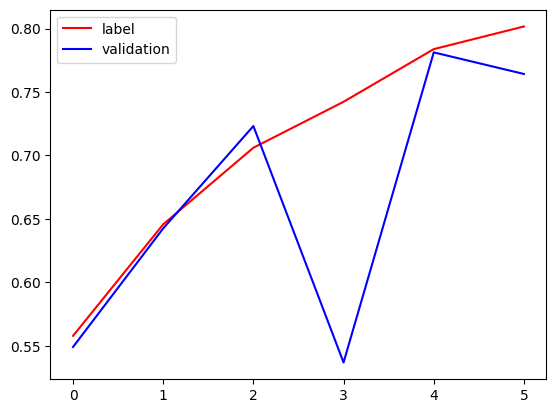

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='label')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

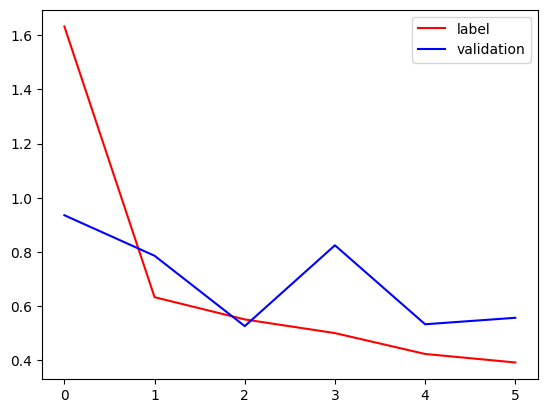

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red',label='label')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()